<a href="https://colab.research.google.com/github/rajagopalmotivate/nano/blob/master/ae_sem_v1_GOOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -r mynewfiles
!mkdir mynewfiles

rm: cannot remove 'mynewfiles': No such file or directory


In [3]:
!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar -O /tmp/dir1.tar

--2019-09-06 14:52:21--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446080 (82M) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar       100%[===================>]  82.44M  20.9MB/s    in 4.7s    

2019-09-06 14:52:27 (17.6 MB/s) - ‘/tmp/dir1.tar’ saved [86446080/86446080]



In [0]:
!tar xf  /tmp/dir1.tar -C mynewfiles

In [5]:
!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar -O /tmp/dir2.tar


--2019-09-06 14:52:30--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 709304320 (676M) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>] 676.45M  21.5MB/s    in 33s     

2019-09-06 14:53:03 (20.6 MB/s) - ‘/tmp/dir2.tar’ saved [709304320/709304320]



In [0]:
!tar xf  /tmp/dir2.tar -C mynewfiles

In [7]:
!ls mynewfiles

Biological  Fibres


In [8]:
!ls mynewfiles/Biological   -1 | wc -l

972


In [9]:
import os



rock_dir = os.path.join('mynewfiles/Biological')
paper_dir = os.path.join('mynewfiles/Fibres')
scissors_dir = os.path.join('mynewfiles/Fibres')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 972
total training paper images: 162
total training scissors images: 162
['L7_3186245e66dd76244bdf5a37149709ab.jpg', 'L7_8e4c2599760804cce03f4a0536a6d66c.jpg', 'L7_f69f8eb99e9ddcbb251cd1dbaa96a341.jpg', 'L7_1456260886d2a12945cdfbd9e9b0b6a2.jpg', 'L7_50ed8ad905f24b5bae148d3b6e8632d2.jpg', 'L7_f95744f598e9abbba167b30ced6755d3.jpg', 'L7_15a2a863aee6cd2bdda5a6c39605c130.jpg', 'L7_220f4fb815169cf6e470aaeab95aeece.jpg', 'L7_98b4f58f3cd895678a7c41f0ecf16207.jpg', 'L7_f01ded7cdae8b7a28d95caa22e2d9d28.jpg']
['L9_dcf3a7c7bcd6e1e9e84254ed5d25d507.jpg', 'L9_c81447cb01b079ebe20e99f4b8181572.jpg', 'L9_dfa5a1d27e09ab08e50a2bf4bb4c7495.jpg', 'L9_d0f8e69f7e310b5318e487e5c1a0c48d.jpg', 'L9_75992e24ebef685ed1fc4380b939734a.jpg', 'L9_bbbcf5b126ec22b66db5f714a9f54bef.jpg', 'L9_f1fc6ebe86c29da1a8bbdc1e109d818f.jpg', 'L9_43f3b5f183a8fbeae784915dfdf826a6.jpg', 'L9_af06df19c424bbf8f58c3c00df118f08.jpg', 'L9_d791ee9a3344836abc3b9fd766ca7650.jpg']
['L9_dcf3a7c7bcd6e1e9e84254ed5d25d507

In [0]:
SIZE = 224

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.preprocessing import image 


Using TensorFlow backend.


In [0]:
DATASETCLASSMODE= 'input'
#DATASETCLASSMODE= 'categorical'

In [0]:
BATCHSIZE=100

In [14]:
TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.1, rescale=1./255,      rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=BATCHSIZE,
	  class_mode='input'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=BATCHSIZE,
	class_mode='input'
)




test_datagen = ImageDataGenerator( rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=BATCHSIZE,
    class_mode='input',
    shuffle=True,
    seed=42
)

Found 1021 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Found 1134 images belonging to 2 classes.


In [15]:
for image_batch, label_batch in test_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (100, 224, 224, 3)
Label batch shape:  (100, 224, 224, 3)


NameError: ignored

In [17]:

# Define the model
model = Sequential()




#1st convolution layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(SIZE,SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#-------------------------
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#-------------------------

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy')




W0906 14:56:41.486758 139797451839360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 14:56:41.534966 139797451839360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 14:56:41.543582 139797451839360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 14:56:41.574732 139797451839360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 14:56:41.612085 139797451839360 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 2)       290       
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 2)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 2)        

In [0]:
steps_per_epoch = 1000 / BATCHSIZE

In [19]:
# Train the model
model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // BATCHSIZE,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=100 // BATCHSIZE)
        



W0906 14:56:43.267920 139797451839360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/4
10/10 [==============================] - 32s 3s/step - loss: 0.6941 - val_loss: 0.6933
Epoch 2/4
10/10 [==============================] - 27s 3s/step - loss: 0.6923 - val_loss: 0.6903
Epoch 3/4
10/10 [==============================] - 31s 3s/step - loss: 0.6875 - val_loss: 0.6819
Epoch 4/4
10/10 [==============================] - 25s 2s/step - loss: 0.6772 - val_loss: 0.6611


In [20]:
train_generator.batch_index

0

AttributeError: ignored

In [22]:
# Test the model
data_list = []
batch_index = 0
while batch_index <= train_generator.batch_index:
    data = train_generator.next()
    print(data[0].shape)
    data_list.append(data[0])
    batch_index = batch_index + 1



(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(100, 224, 224, 3)
(21, 224, 224, 3)


In [23]:
data = train_generator.next()
print(data[0].shape)


(100, 224, 224, 3)


In [0]:
predictedimage = model.predict(data[0])

In [25]:
predictedimage.shape

(100, 224, 224, 3)

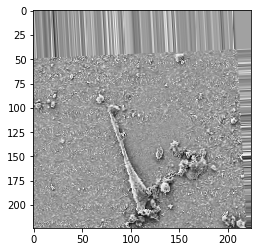

In [26]:
plt.imshow(data[0][69])

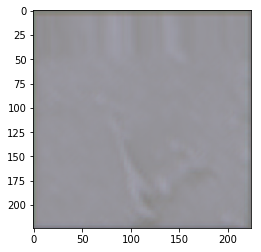

In [27]:
plt.imshow(predictedimage[69])

In [0]:
layer_outputs = 0

In [63]:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

print( layer_outputs[0])
print( layer_outputs[9])

[<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 224, 224, 16) dtype=float32>, <tf.Tensor 'activation_1/Relu:0' shape=(?, 224, 224, 16) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 112, 112, 16) dtype=float32>, <tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 112, 112, 2) dtype=float32>, <tf.Tensor 'activation_2/Relu:0' shape=(?, 112, 112, 2) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 56, 56, 2) dtype=float32>, <tf.Tensor 'conv2d_3/BiasAdd:0' shape=(?, 56, 56, 2) dtype=float32>, <tf.Tensor 'activation_3/Relu:0' shape=(?, 56, 56, 2) dtype=float32>, <tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, 112, 112, 2) dtype=float32>, <tf.Tensor 'conv2d_4/BiasAdd:0' shape=(?, 112, 112, 16) dtype=float32>, <tf.Tensor 'activation_4/Relu:0' shape=(?, 112, 112, 16) dtype=float32>, <tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, 224, 224, 16) dtype=float32>, <tf.Tensor 'conv2d_5/BiasAdd:0' shape=(?, 224, 224, 3) dtype=float32>, <tf.Tensor 'acti

In [595]:
layerindex = 1
for alayer in model.layers:
  if ("conv" in alayer.name):
    print( str(layerindex) + '  \t' + str(alayer.name) + '\t' +str(alayer.input_shape ) )
  layerindex = layerindex + 1 

1  	conv2d_1	(None, 224, 224, 3)
4  	conv2d_2	(None, 112, 112, 16)
7  	conv2d_3	(None, 56, 56, 2)
10  	conv2d_4	(None, 112, 112, 2)
13  	conv2d_5	(None, 224, 224, 16)


In [0]:
pic_index = 8 #@param {type:"slider", min:0, max:100, step:1}


In [0]:
NanoMaterial = 'Fibres' #@param ["Biological", "Fibres"]

In [0]:
seeActivationAtLayer = 12 #@param {type:"slider", min:0, max:16, step:1}


In [0]:
from keras import models

activation_model = 0
activation_model = models.Model(model.input, outputs=layer_outputs[seeActivationAtLayer])

In [957]:
print( layer_outputs[6])

Tensor("conv2d_3/BiasAdd:0", shape=(?, 56, 56, 2), dtype=float32)


mynewfiles/Fibres/L9_f1fc6ebe86c29da1a8bbdc1e109d818f.jpg
(768, 1024, 3)


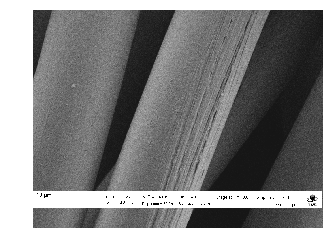

mynewfiles/Fibres/L9_43f3b5f183a8fbeae784915dfdf826a6.jpg
(768, 1024, 3)


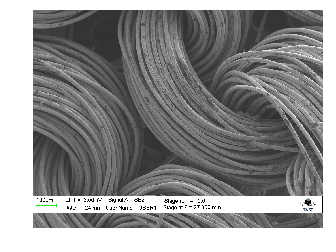

mynewfiles/Fibres/L9_f1fc6ebe86c29da1a8bbdc1e109d818f.jpg
(768, 1024, 3)


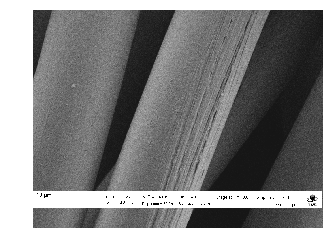

mynewfiles/Fibres/L9_43f3b5f183a8fbeae784915dfdf826a6.jpg
(768, 1024, 3)


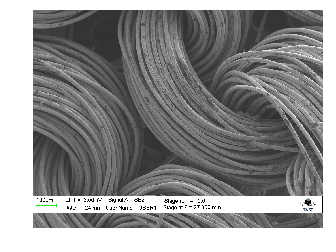

In [958]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

img_path = 0
#for i, img_path in enumerate(next_rock+next_paper+next_scissors):
for i, img_pathany in enumerate(next_rock+next_paper+next_scissors):
  if NanoMaterial in img_pathany:
    img = mpimg.imread(img_pathany)
    print(img_pathany)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    img_path = img_pathany

(1, 224, 224, 3)


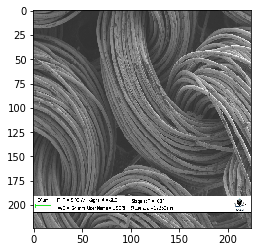

In [959]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
plt.imshow(img)


In [0]:
activations = activation_model.predict(img_tensor)


In [961]:
activations.shape

(1, 224, 224, 3)

In [962]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(224, 224, 3)


In [0]:
import matplotlib.pyplot as plt



In [0]:
layer_activation = activations[0]


In [0]:
images_per_row = 16

n_features = layer_activation.shape[-1]

n_features

if n_features <= 4: 
  images_per_row = 2

In [966]:
size = layer_activation.shape[1]
size

224

In [0]:
n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

3
1
(224, 448)


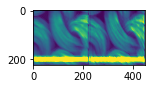

In [968]:
n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row



display_grid =0
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [969]:
data_list[0].shape

(100, 224, 224, 3)

In [970]:
data_list[0][19].shape

(224, 224, 3)

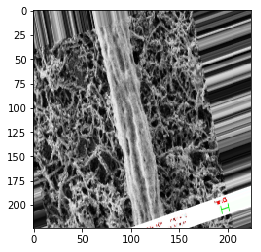

In [971]:
predicted = model.predict(data_list[0])
plt.imshow(data_list[0][0])


In [972]:
predicted[19].shape

(224, 224, 3)

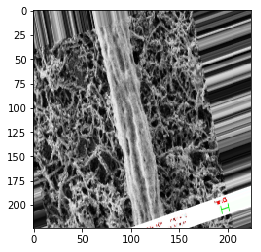

In [973]:
plt.imshow(data_list[0][0])

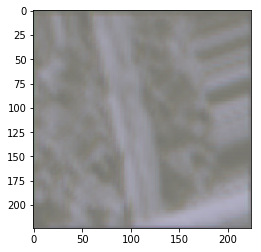

In [974]:
plt.imshow(predicted[0])

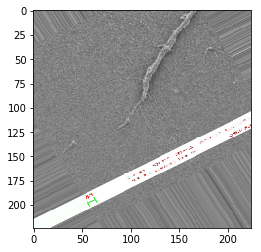

In [975]:
plt.imshow(data_list[0][3])


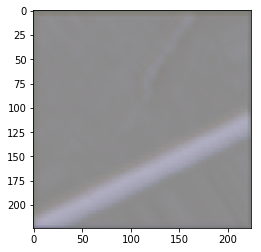

In [976]:
plt.imshow(predicted[3])

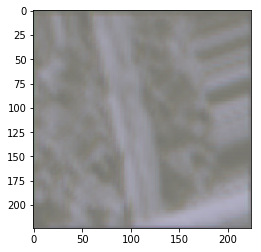

In [977]:
plt.imshow(predicted[0])

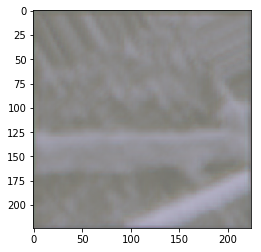

In [978]:
plt.imshow(predicted[1])

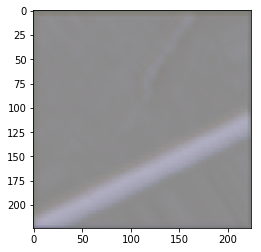

In [979]:
plt.imshow(predicted[3])

In [980]:
predicted[0].shape

(224, 224, 3)

In [981]:
for image_batch in test_generator:
  print("Image batch shape: ", image_batch.shape)
  break

AttributeError: ignored